In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.datasets import make_moons

In [2]:
import os

In [13]:
X, y = make_moons(n_samples=1000, random_state=42, noise=0.2)

# Dataset


## make_moons dataset

In [15]:
class MakeMoonsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X)
        self.y = torch.from_numpy(y).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return (self.X[index], self.y[index])

In [16]:
train_dataset = MakeMoonsDataset(X=X, y=y)

In [20]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

In [22]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features, train_labels)

tensor([[ 0.6567, -0.5813],
        [ 0.0143,  0.6735],
        [-0.4566,  0.9973],
        [-0.9992, -0.0458]]) tensor([1., 0., 0., 0.])


## wine dataset

In [33]:
class WineDataset(Dataset):
    def __init__(self, path):
        dataset = pd.read_csv(path)
        self.X = torch.Tensor(dataset["Wine"].values)
        self.y = torch.from_numpy(dataset.drop(columns=["Wine"]).values).float()
        self.shape = dataset.shape[0]

    def __len__(self):
        return self.shape

    def __getitem__(self, index):
        return (self.X[index], self.y[index])

In [34]:
train_wine_dataset = WineDataset(path="../data/regression_task/wine.csv")

In [35]:
train_wine_dataloader = DataLoader(
    dataset=train_wine_dataset, batch_size=4, shuffle=True
)
train_features, train_labels = next(iter(train_dataloader))
print(train_features, train_labels)

tensor([[ 0.0371,  0.1690],
        [ 1.0732, -0.5587],
        [ 0.6316,  0.5278],
        [-0.9901,  0.3891]]) tensor([1., 1., 0., 0.])


## mnist dataset

dataset : https://github.com/DeepTrackAI/MNIST_dataset/tree/main/mnist

In [3]:
import os
from torchvision.io import read_image


class MnistDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.image_files = []
        self.labels = []

        for filename in os.listdir(path=path):
            if filename.endswith(".png"):
                label = filename[0]
                self.image_files.append(filename)
                self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        image_path = os.path.join(self.path, self.image_files[index])
        image = read_image(image_path)
        label = self.labels[index]

        if self.transform:
            image = self.transform(image)

        return image, label

In [4]:
train_mnist_dataset = MnistDataset(path="../data/mnist/train")

Feature batch shape: torch.Size([1, 1, 28, 28])


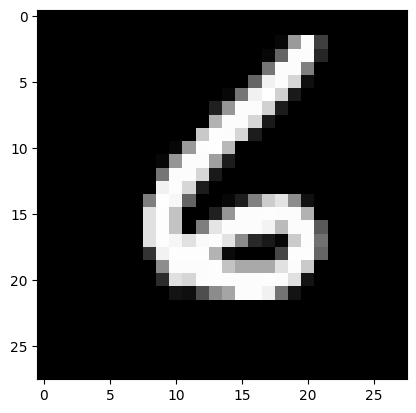

Label: 6


In [5]:
import matplotlib.pyplot as plt
train_mnist_dataloader = DataLoader(dataset=train_mnist_dataset, shuffle=True)
# Display image and label.
train_features, train_labels = next(iter(train_mnist_dataloader))S
print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")